## Analysis

In [2]:
# Observed Trend 1: 
# Observed Trend 2: 
# Observed Trend 3: 

In [3]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Load in csvs
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")
city_data.head()
# Merge data
city_ride_merged = pd.merge(city_data, ride_data,
                                 how='outer', on='city')
city_ride_merged.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


## Bubble Plot of Ride Sharing Data

In [5]:
# Bubble Plot
# Group by city DF
grouped_city = city_ride_merged.groupby('city')

In [6]:
# Average Fare ($) Per City
grouped_city_mean = city_ride_merged.groupby('city').mean()
average_fare = grouped_city_mean['fare']
average_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [7]:
# Total Number of Rides Per City
grouped_city_count = city_ride_merged.groupby('city').count()
total_rides = grouped_city_count['fare']
total_rides.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: fare, dtype: int64

In [8]:
# Total Number of Drivers Per City
grouped_city_max = city_ride_merged.groupby('city').max()
driver_count = grouped_city_max['driver_count']
driver_count.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [9]:
# City Type(Urban, Suburban, Rural)
city_type = grouped_city_max['type']
city_type.head()

city
Alvarezhaven       Urban
Alyssaberg         Urban
Anitamouth      Suburban
Antoniomouth       Urban
Aprilchester       Urban
Name: type, dtype: object

In [10]:
# new df for bubbleplot
bubbleplot_df = pd.DataFrame({"Total Number of Rides": total_rides,
                              "Total Number of Drivers": driver_count,
                              "City Types": city_type,
                              "Average Fare": average_fare})
bubbleplot_df.head()

,Average Fare,City Types,Total Number of Drivers,Total Number of Rides
city,,,,
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


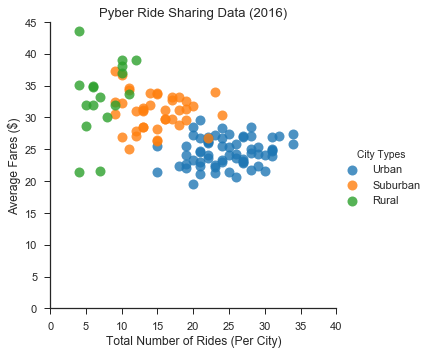

In [20]:
# create bubble plot with seaborn
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Total Number of Rides', # Horizontal axis
           'Average Fare', # Vertical axis
           data = bubbleplot_df, # Data source
           fit_reg = False, # Don't fix a regression line
           hue = "City Types", # Set color
           scatter_kws = {"marker": "D", # Set marker style
                        "s": 100}) # S marker size
# SET GRIDLINES...
plt.style.use('seaborn-whitegrid')

# Set title
plt.title('Pyber Ride Sharing Data (2016)')

# Set x-axis label
plt.xlabel('Total Number of Rides (Per City)')

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 45)

# The x limits of our scatter plot is 0 to 100
plt.xlim(0,40)

# Set y-axis label
plt.ylabel('Average Fares ($)')
plt.show()

## Total Fares by City Type

In [12]:
# group data by city type
grouped_citytype = city_ride_merged.groupby('type')


In [13]:
# get sum of fares by city type
total_fares_group = grouped_citytype['fare'].sum()
total_fares_group


type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

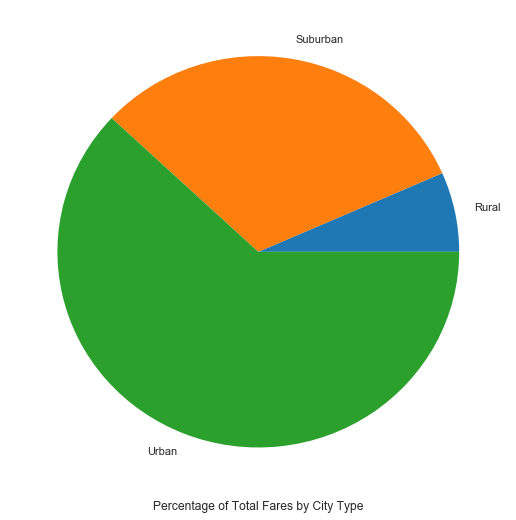

In [14]:
# Create a pie chart based off of the group series from before
total_fares_chart = total_fares_group.plot(kind='pie', figsize=(9,9))

# Set the xlabel and ylabel using class methods
total_fares_chart.set_xlabel("Percentage of Total Fares by City Type")
total_fares_chart.set_ylabel("")

plt.show()

## Total Rides by City Type

In [15]:
# get sum of fares by city type
total_rides_group = grouped_citytype['fare'].count()
total_rides_group

type
Rural        125
Suburban     657
Urban       1625
Name: fare, dtype: int64

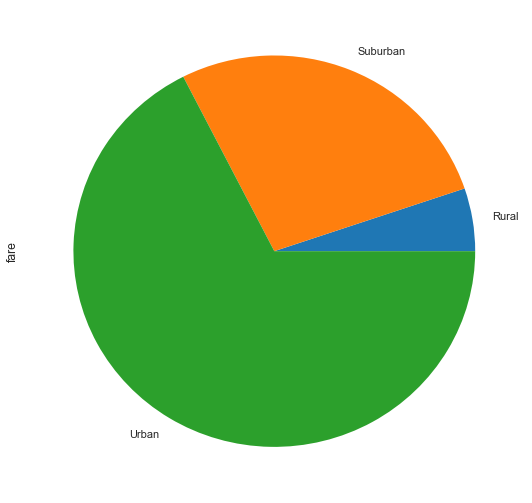

In [16]:
# Create a pie chart based off of the group series from before
total_rides_chart = total_rides_group.plot(kind='pie', figsize=(9,9))

# Set the xlabel and ylabel using class methods
total_fares_chart.set_xlabel("Percentage of Total Rides by City Type")
total_fares_chart.set_ylabel("")

plt.show()

## Total Drivers by City Type

In [17]:
# get sum of fares by city type
new_grouped_city = bubbleplot_df.groupby('City Types')
total_drivers_group = new_grouped_city['Total Number of Drivers'].sum()
total_drivers_group

City Types
Rural        104
Suburban     635
Urban       2607
Name: Total Number of Drivers, dtype: int64

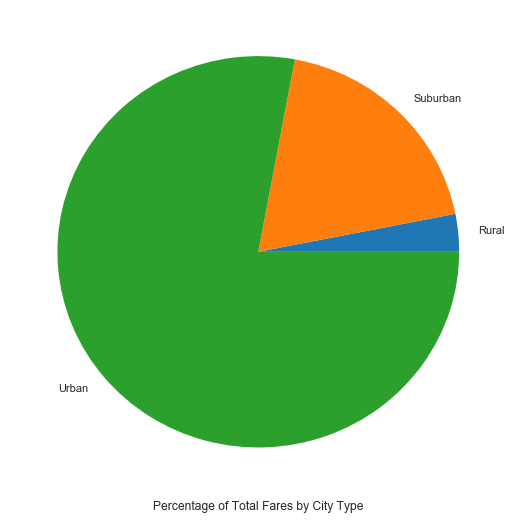

In [18]:
# Create a pie chart based off of the group series from before
total_drivers_chart = total_drivers_group.plot(kind='pie', figsize=(9,9))

# Set the xlabel and ylabel using class methods
total_drivers_chart.set_xlabel("Percentage of Total Fares by City Type")
total_drivers_chart.set_ylabel("")

plt.show()